# SOFM - Clustering and dimensionality reduction

- Author  :  Mohammad Mahdi Khorsand Aalam
- Contact : [Github Page](https://github.com/OOiiOOiiOO)

![Mohammad Mahdi Khorsand](MyPhoto.jpeg)

## Introduction

A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning method that creates a low-dimensional representation of high-dimensional data while maintaining its topological structure. A common example for teaching SOM principles is mapping colors from their RGB components into two dimensions. The network learns to represent these colors as 3D vectors in a 2D space, clustering similar colors into adjacent regions, which is a beneficial feature of Kohonen maps.

![Intro](1.jpg)

## How SOFM Works ?

SOFM operates based on competitive learning. In this learning method, neurons in the network compete to adapt to the input, and only one or a group of neurons "win." The winning neuron, known as the Best Matching Unit (BMU), and its neighboring neurons are updated to align with the input.

![really happens](4.webp)

architecture of the Self Organizing Map with two clusters and n input features of any sample is given below: 

![Intro](5.png)

![Intro](3.png)


## Mathematical Understanding of SOFM

### 1. Problem Definition and Mathematical Parameters

In SOFM, the main objective is to map a high-dimensional input space to a lower-dimensional output space (usually 2D) while preserving the topological structure of the data.

Assume:
- A high-dimensional input vector $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the number of features (dimensions).
- The SOFM network consists of a two-dimensional grid of neurons, where each neuron has a weight vector $\mathbf{w}_{ij} \in \mathbb{R}^n$ associated with it, where $i$ and $j$ represent the coordinates of the neuron on the grid.
- The neurons are arranged on a two-dimensional grid of size $m \times m$. Thus, the number of neurons is $m^2$, and each neuron has a weight vector of length $n$, corresponding to the number of input features.


### 2. Finding the Best Matching Unit (BMU)
To find the Best Matching Unit (BMU), we calculate the Euclidean distance between the input vector $\mathbf{x}$ and the weight vector of each neuron $\mathbf{w}_{ij}$.
The formula for the Euclidean distance is as follows:

$$
d_{ij} = \|\mathbf{x} - \mathbf{w}_{ij}\| = \sqrt{\sum_{k=1}^{n} (x_k - w_{ij,k})^2}
$$

Where:
- $d_{ij}$ is the Euclidean distance between the input vector $\mathbf{x}$ and the weight vector $\mathbf{w}_{ij}$ of the neuron.
- $x_k$ and $w_{ij,k}$ are the $k$-th components of the input vector and the neuron's weight vector, respectively.

The neuron with the smallest distance is selected as the BMU:

$$
BMU = \arg \min_{i,j} d_{ij}
$$

### 3. Updating the Weights
After finding the BMU, the weights of this neuron and its neighboring neurons in the grid are adjusted towards the input vector $\mathbf{x}$. This process is performed such that neurons closer to the BMU undergo larger changes, while neurons further away undergo smaller changes.

The weights are updated using the following formula:

$$
\mathbf{w}_{ij}(t+1) = \mathbf{w}_{ij}(t) + \eta(t) \cdot h_{BMU,ij}(t) \cdot (\mathbf{x}(t) - \mathbf{w}_{ij}(t))
$$

Where:
- $t$ is the time step (or learning iteration).
- $\eta(t)$ is the learning rate, which decreases over time. For example, it can decay exponentially:
  $$
  \eta(t) = \eta_0 \cdot \exp\left(-\frac{t}{\tau}\right)
  $$
  where $\eta_0$ is the initial learning rate and $\tau$ is the time constant.
- $h_{BMU,ij}(t)$ is the neighborhood function that defines the influence of neuron $\mathbf{w}_{ij}$ from the BMU. This function depends on the distance between neuron $(i,j)$ and the BMU and is usually defined as a Gaussian:
  $$
  h_{BMU,ij}(t) = \exp\left(-\frac{\|\mathbf{r}_{BMU} - \mathbf{r}_{ij}\|^2}{2\sigma^2(t)}\right)
  $$
  where $\mathbf{r}_{BMU}$ and $\mathbf{r}_{ij}$ are the positions of the BMU and the $(i,j)$ neuron on the grid, respectively.
- $\sigma(t)$ is the neighborhood radius, which also decreases over time. It typically decays exponentially:
  $$
  \sigma(t) = \sigma_0 \cdot \exp\left(-\frac{t}{\tau_\sigma}\right)
  $$
  where $\sigma_0$ is the initial neighborhood radius and $\tau_\sigma$ is the time constant for the neighborhood size.

### 4. Learning Rate and Neighborhood Function
There are two key factors in SOFM that change over time:

- The **learning rate** $\eta(t)$: Initially, it is large to allow the network to respond quickly to the input, but it decreases over time to ensure more fine-tuned learning.
- The **neighborhood radius** $\sigma(t)$: Initially large, it allows more neurons to be influenced by the BMU, enabling a more global learning phase. As time progresses, this radius decreases, so only neurons close to the BMU are updated, leading to finer, localized learning.

The decay of both the learning rate and the neighborhood radius ensures that the network converges to a stable mapping of the input data.

### 5. Topology and Mapping
SOFM is designed to preserve the topological structure of the input data. This means that if two input vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ are close to each other in the high-dimensional space, their corresponding BMUs should also be close to each other in the two-dimensional grid.

This topological preservation occurs because of the neighborhood function and the weight update rule that allows neighboring neurons to be updated along with the BMU. As a result, SOFM naturally clusters the data and maintains the topological structure of the input space.


## General Algorithm for SOFM
The general SOFM algorithm includes the following steps:

1. **Initialization**:
   - The weights of the neurons are initialized randomly.
   - The initial learning rate $\eta(0)$ and neighborhood radius $\sigma(0)$ are set.
   
2. **Repeat for each input sample**:
   - An input vector $\mathbf{x}$ is chosen.
   - The distance between the input vector and the weight vector of each neuron $\mathbf{w}_{ij}$ is calculated.
   - The Best Matching Unit (BMU) is identified.
   - The weights of the BMU and its neighbors are updated using the formulas above.
   - The learning rate $\eta(t)$ and neighborhood radius $\sigma(t)$ are decayed.
   
3. **End**:
   - The learning process is stopped after a certain number of iterations or when convergence is achieved.


## Applications of SOFM

**Clustering:**
SOFM can automatically cluster data. Similar data points are mapped to neurons close to each other on the map.

**Data Visualization:**
Due to SOFM's ability to map high-dimensional data into a 2D space, it is an effective tool for visualizing data and hidden patterns within it.

**Image Processing:**
SOFM is used in image processing and pattern recognition, as it can map image features to a simpler topological map.

**Medical Data Analysis:**
In analyzing medical signals like EEG and ECG, SOFM helps identify significant patterns.

**Market Analysis:**
In financial markets, SOFM can be used for clustering and analyzing behavioral patterns in financial data.


## Advantages
**Unsupervised Learning:** SOFM does not require labeled data and can automatically identify patterns.
**Topology Preservation:** SOFM maps data to a 2D space while maintaining similarities and differences.
**Dimensionality Reduction:** SOFM is one of the best methods for visualizing complex data in a 2D space.
**Automatic Clustering:** Data is automatically clustered into different groups.




## Clustering and dimensionality reduction with sofm

In this project, we use SOFM methods and formulas to cluster and reduce data dimensions

### Dataset

The Wine dataset is a well-known dataset in the field of machine learning

**1. Origin**

Source: The dataset comes from the UCI Machine Learning Repository.
Context: It contains information on various chemical properties of wines, which can be used for classification based on their origin.

**2. Data Description**

Number of Instances: The dataset consists of 178 instances (rows).
Number of Attributes: There are 13 attributes (features) that describe the chemical composition of the wines.

**3. Attributes**
The dataset includes the following attributes:

- **Class:**
The first attribute indicates the class of the wine (1, 2, or 3). This is the target variable for classification.

- **Alcohol:**
The alcohol content of the wine (% by volume).
 
- **Malic Acid:** 
The amount of malic acid in the wine (grams per liter).
 
- **Ash:** 
The ash content of the wine (grams per liter).

- **Alcalinity of Ash:** 
The alkalinity of the ash (grams per liter).

- **Magnesium:** 
The magnesium content of the wine (mg per liter).

- **Total Phenols:** 
The total phenolic content (grams per liter).

- **Flavanoids:** 
The flavanoid content (grams per liter).
 
- **Nonflavanoid Phenols:** 
The non-flavanoid phenolic content (grams per liter).

- **Proanthocyanins:**
The proanthocyanin content (grams per liter).

- **Color Intensity:**
The intensity of the color of the wine (arbitrary units).

- **Hue:**
The hue of the wine (arbitrary units).

-**OD280/OD315 of Diluted Wines:**
The optical density at 280 nm and 315 nm.

- **Proline:**
The proline content (grams per liter).

**4. Data Format**
The dataset is typically provided in a comma-separated values (CSV) format.
The first row contains the headers, while the subsequent rows contain the data.

**5. Applications**

- **Classification:** 
The primary use of the Wine dataset is for classification tasks. The goal is to predict the wine class (1, 2, or 3) based on its chemical properties.

- **Clustering:**
It can also be used for clustering, where unsupervised learning techniques (like SOFM) can be applied to find patterns in the data without predefined labels.


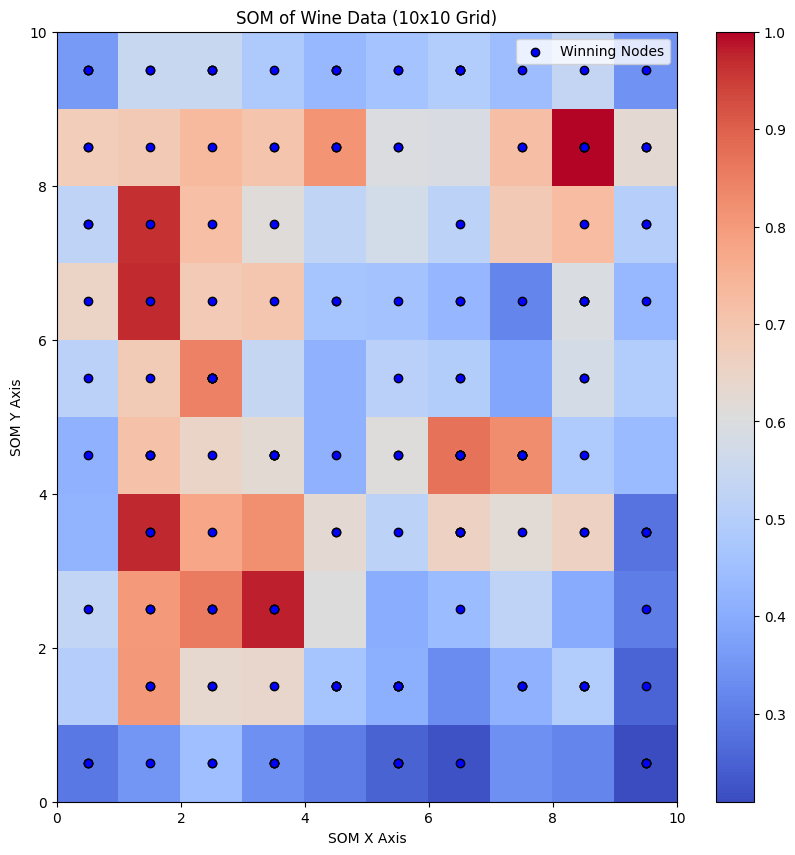

In [22]:
# Import necessary libraries for SOFM and data loading
!pip install minisom
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

# Separate features and labels (if needed)
X = df.iloc[:, 1:].values  # Features
# y = df.iloc[:, 0].values  # Uncomment if you want to use labels

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(X)

# Define the size of the SOM grid
som_grid_x = 10
som_grid_y = 10

# Initialize and train the Self-Organizing Feature Map (SOFM)
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=data_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_normalized)
som.train_random(data_normalized, 100)  # Train for 100 iterations

# Get the winner nodes for each data point
winner_nodes = np.array([som.winner(x) for x in data_normalized])

# Create a dataframe to store winner nodes
winner_df = pd.DataFrame(winner_nodes, columns=['x', 'y'])

# Visualizing the SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot the distance map as background
plt.colorbar()

# Plot the winning nodes for each data point
plt.scatter(winner_nodes[:, 0] + 0.5, winner_nodes[:, 1] + 0.5, c='blue', edgecolors='k', label='Winning Nodes')
plt.title('SOM of Wine Data (10x10 Grid)')
plt.xlabel('SOM X Axis')
plt.ylabel('SOM Y Axis')
plt.legend()
plt.show()


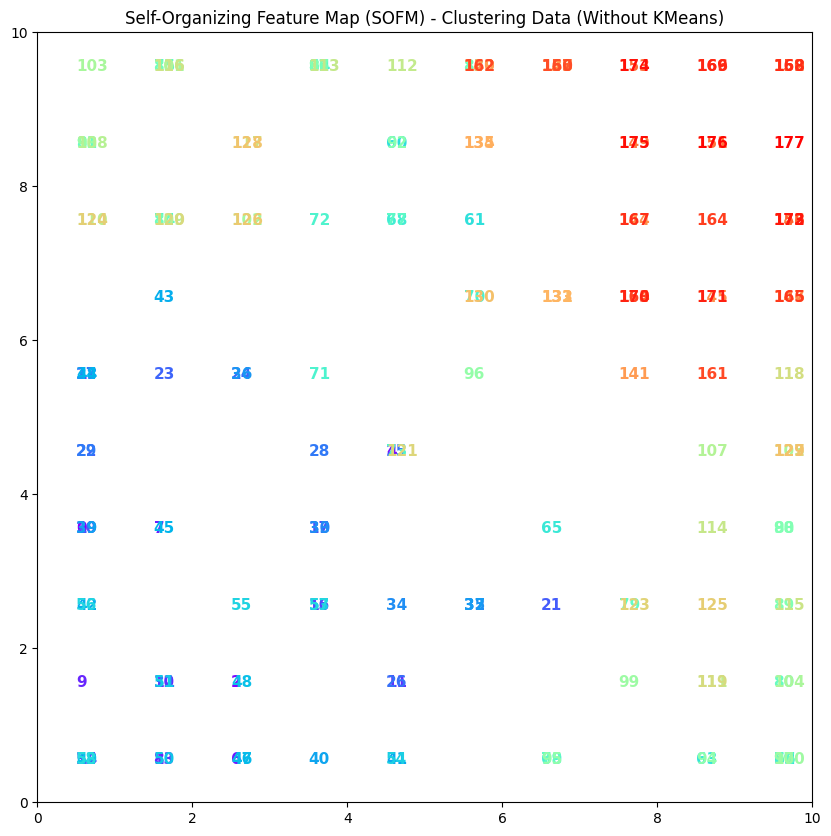

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the SOFM class (using previously provided code)
class SOFM:
    def __init__(self, input_dim, map_size, learning_rate=0.5, sigma=None, max_iterations=1000):
        self.input_dim = input_dim
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else map_size / 2
        self.max_iterations = max_iterations
        self.weights = np.random.random((map_size, map_size, input_dim))

    def find_bmu(self, x):
        """ Find the Best Matching Unit (BMU) """
        distances = np.linalg.norm(self.weights - x, axis=-1)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration):
        """ Neighborhood function (Gaussian decay) """
        sigma = self.sigma * np.exp(-iteration / (self.max_iterations / np.log(self.sigma)))
        distances = np.linalg.norm(np.indices((self.map_size, self.map_size)).T - np.array(bmu), axis=-1)
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))

    def train(self, data):
        for iteration in range(self.max_iterations):
            x = data[np.random.randint(0, len(data))]  # Random input
            bmu = self.find_bmu(x)
            learning_rate_t = self.learning_rate * np.exp(-iteration / self.max_iterations)
            neighborhood = self.neighborhood_function(bmu, iteration)
            for i in range(self.map_size):
                for j in range(self.map_size):
                    self.weights[i, j] += learning_rate_t * neighborhood[i, j] * (x - self.weights[i, j])

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(url, header=None)

# Extract features and standardize them
X = data.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train SOFM
sofm = SOFM(input_dim=X_scaled.shape[1], map_size=10, learning_rate=0.5, max_iterations=1000)
sofm.train(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 10))

# Plot labels based on BMU without KMeans
for i, x in enumerate(X_scaled):
    w = sofm.find_bmu(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color=plt.cm.rainbow(i / len(X_scaled)), fontdict={'weight': 'bold', 'fontsize': 11})

plt.xlim([0, sofm.weights.shape[0]])
plt.ylim([0, sofm.weights.shape[1]])
plt.title('Self-Organizing Feature Map (SOFM) - Clustering Data (Without KMeans)')
plt.show()


34568.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


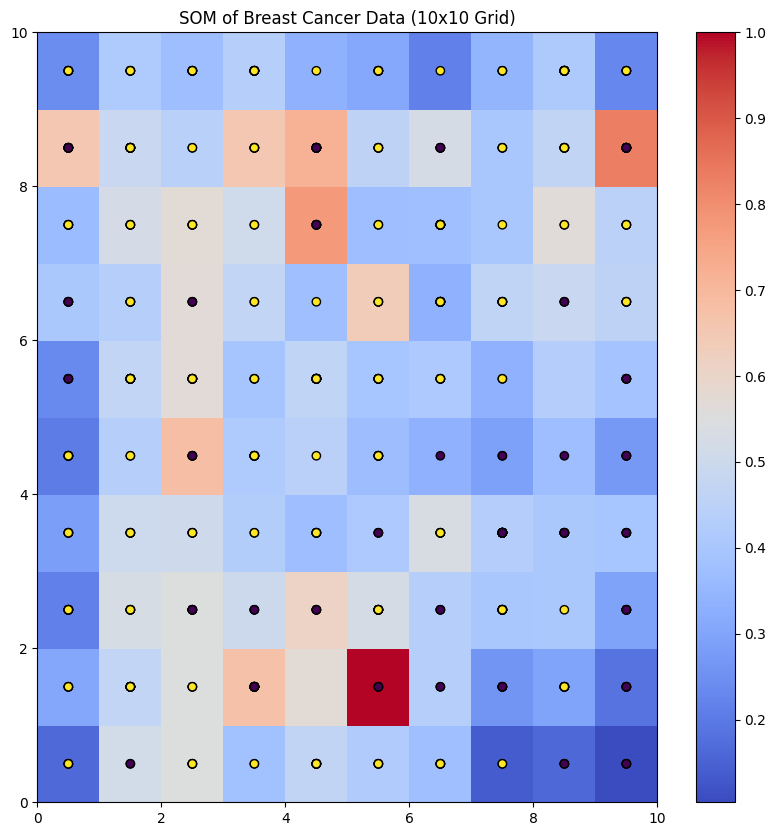

In [27]:
# Import necessary libraries for SOFM and data loading
!pip install minisom
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)

# Define the size of the SOM grid
som_grid_x = 10
som_grid_y = 10

# Initialize and train the Self-Organizing Feature Map (SOFM)
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=data_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_normalized)
som.train_random(data_normalized, 100)  # Train for 100 iterations

# Get the winner nodes for each data point
winner_nodes = np.array([som.winner(x) for x in data_normalized])

# Create a dataframe to store winner nodes
winner_df = pd.DataFrame(winner_nodes, columns=['x', 'y'])

# Visualizing the SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot the distance map as background
plt.colorbar()

# Plot the winning nodes for each data point
plt.scatter(winner_nodes[:, 0] + 0.5, winner_nodes[:, 1] + 0.5, c=data.target, cmap='viridis', edgecolors='k')
plt.title('SOM of Breast Cancer Data (10x10 Grid)')
plt.show()

## References
**1.** http://www.ai-junkie.com/ann/som/som1.html
**2.** Applications of the growing self-organizing map, Th. Villmann, H.-U. Bauer, May 1998
**3.** [A Comprehensive Introduction to Self-Organizing Maps](https://towardsdatascience.com/?gi=71eda8a06083)
**4.**